# Fundamentos de la Programación (Grado en Ingeniería de la Salud)
## Ejercicio "Aplicaciones Android" (13 de diciembre 2018)

Antes de empezar, ejecutaremos la siguiente celda con las importaciones necesarias para poder realizar el ejercicio:

In [22]:
import csv
from matplotlib import pyplot as plt

## 1. Carga de datos (1 punto)

Tomaremos los datos de un fichero de entrada llamado <code>aplicaciones_android.csv</code> en el que se encuentran registradas estadísticas sobre distintas aplicaciones del _android market_. El fichero se encuentra en la carpeta <code>./data</code>. Cada línea del fichero de entrada contiene las siguientes cuatro informaciones sobre una determinada aplicación:

- **Category:** nombre de la categoría en la que se incluye la aplicación
- **Rating:** puntuación media otorgada por los usuarios
- **Reviews:** número de usuarios que han opinado sobre la aplicación
- **Type:** tipo de la aplicación (<code>Free</code> o <code>Paid</code>)

He aquí un fragmento con las primeras líneas del fichero de entrada:
<pre>
    Category,Rating,Reviews,Type
    ART_AND_DESIGN,4.1,159,Free
    ART_AND_DESIGN,3.9,967,Free
    ART_AND_DESIGN,4.7,87510,Free
    ART_AND_DESIGN,4.5,215644,Free
    ART_AND_DESIGN,4.3,967,Free

</pre>

La primera función que implementaremos será la de lectura. Será la encargada de leer los datos del fichero de entrada y cargarlos en una lista de tuplas:

In [2]:
def lee_aplicaciones(fichero):
    ''' Lee el fichero de entrada y devuelve una lista de tuplas
    
    ENTRADA:
       - fichero: nombre del fichero de entrada
    SALIDA:
       - lista de registros -> [(str, float, int, str)]

    Hay que transformar ciertos elementos de la entrada en valores numéricos
    para que puedan ser procesados posteriormente.
    '''
    registros = []
    with open(fichero, 'r', encoding='utf-8') as f:
        lector = csv.reader(f)
        next(lector)
        registros = [(categoria, float(valoracion), int(opiniones), tipo)
                    for categoria, valoracion, opiniones, tipo in lector]
    return registros

In [3]:
# Test de la función lee_estadisticas
registros = lee_aplicaciones(r'aplicaciones_android.csv')

# La salida esperada de la siguiente instrucción es: 
#    9366 [('ART_AND_DESIGN', 4.1, 159, 'Free'), ('ART_AND_DESIGN', 3.9, 967, 'Free')] 
print(len(registros), registros[:2])

9366 [('ART_AND_DESIGN', 4.1, 159, 'Free'), ('ART_AND_DESIGN', 3.9, 967, 'Free')]


## 2. Consulta y filtrado (7 puntos)

Una vez que hemos cargado los datos en una estructura en memoria ya podemos empezar a procesarlos. En esta sección implementaremos algunas funciones de consulta y filtrado que nos permitirán trabajar con ellos.

La primera función que implementaremos se llama <code>proporcion_gratuitas</code>. La función toma una lista de tuplas de registros y calcula qué proporción de aplicaciones son gratuitas:

In [4]:
def proporcion_gratuitas(registros):
    ''' Proporcion de aplicaciones gratuitas
    
    ENTRADA:
       - registros: lista de registros -> [(str, float, int, str)]
    SALIDA:
       - proporcion de aplicacionres gratuitas -> float
    '''
    numeroAppsTotales = len(registros)
    numeroAppsGratuitas = 0 
    for i in registros:
        if i[3] == "Free":
            numeroAppsGratuitas = numeroAppsGratuitas + 1
    return numeroAppsGratuitas/numeroAppsTotales        

In [5]:
# Test de la función proporcion_gratuitas
proporcion = proporcion_gratuitas(registros)

# La salida esperada de la siguiente instrucción es: 
#   0.9309203502028615
print(proporcion)

0.9309203502028615


La segunda función se llama <code>calcula_categorias</code>. Toma una lista de registros y produce como salida un conjunto con los nombres de todas las categorías distintas que aparecen en dicha lista de registros:


In [6]:
def calcula_categorias(registros):
    ''' Calcula las categorias presentes en una lista de registros
    
    ENTRADA:
       - registros: lista de registros -> [(str, float, int, str)]
    SALIDA:
       - conjunto de categorias presentes en los registros -> {str}
    '''
    solucion = []
    for i in registros:
        solucion.append(i[0])
    return set(solucion)

In [7]:
# Test de la función calcula_categorias
categorias = calcula_categorias(registros)

# La salida siguiente instrucción es la siguiente, al ser un conjunto el orden puede no coincidir: 
#    33 {'COMMUNICATION', 'SOCIAL', 'DATING', 'BOOKS_AND_REFERENCE', 'SHOPPING', 'EDUCATION', 'PHOTOGRAPHY', 'HOUSE_AND_HOME', 
#        'VIDEO_PLAYERS', 'LIFESTYLE', 'FINANCE', 'FOOD_AND_DRINK', 'MAPS_AND_NAVIGATION', 'MEDICAL', 'ENTERTAINMENT', 
#        'LIBRARIES_AND_DEMO', 'TRAVEL_AND_LOCAL', 'GAME', 'BUSINESS', 'PRODUCTIVITY', 'TOOLS', 'PERSONALIZATION', 'SPORTS',
#        'HEALTH_AND_FITNESS', 'BEAUTY', 'ART_AND_DESIGN', 'PARENTING', 'NEWS_AND_MAGAZINES', 'FAMILY', 'EVENTS', 'WEATHER', 
#        'AUTO_AND_VEHICLES', 'COMICS'}
print(len(categorias), categorias)

33 {'GAME', 'FINANCE', 'AUTO_AND_VEHICLES', 'COMMUNICATION', 'SOCIAL', 'SPORTS', 'TRAVEL_AND_LOCAL', 'EVENTS', 'BUSINESS', 'TOOLS', 'LIBRARIES_AND_DEMO', 'WEATHER', 'NEWS_AND_MAGAZINES', 'FOOD_AND_DRINK', 'PHOTOGRAPHY', 'PERSONALIZATION', 'BOOKS_AND_REFERENCE', 'ENTERTAINMENT', 'VIDEO_PLAYERS', 'FAMILY', 'DATING', 'HOUSE_AND_HOME', 'MAPS_AND_NAVIGATION', 'COMICS', 'MEDICAL', 'LIFESTYLE', 'SHOPPING', 'PRODUCTIVITY', 'PARENTING', 'BEAUTY', 'EDUCATION', 'ART_AND_DESIGN', 'HEALTH_AND_FITNESS'}


La siguiente función se llama <code>filtra_por_categorias</code>. Toma una lista de registros y una lista de categorias, y selecciona solo los registros de las categorias indicadas:

In [8]:
def filtra_por_categorias(registros, categorias):
    ''' Selecciona registros por categorias
    
    ENTRADA:
       - registros: lista de registros -> [(str, float, int, str)]
       - categorias: lista de categorias a seleccionar -> [str]
    SALIDA:
       - lista de registros de las categorias indicadas -> [(str, float, int, str)]
    '''
    solucion = []
    for i in registros:
        if i[0] in categorias:
            solucion.append(i)
    return solucion

In [9]:
# Test de la función filtra_por_categorias
filtrados = filtra_por_categorias(registros, ['BEAUTY','SPORTS','SOCIAL'])

# La salida esperada de la siguiente instrucción es: 
#    620 [('BEAUTY', 4.7, 18900, 'Free'), ('BEAUTY', 4.9, 49790, 'Free')] 
print(len(filtrados), filtrados[:2])

620 [('BEAUTY', 4.7, 18900, 'Free'), ('BEAUTY', 4.9, 49790, 'Free')]


La siguiente función de esta sección se llama <code>puntuacion_media_por_categoria</code>. Toma como entrada una lista de registros, y produce como salida un diccionario cuyas claves son las categorías. Los valores del diccionario son las puntuaciones medias correspondientes a cada categoría.

In [10]:
'''
Función para obtener número de reseñas dada una categoría.
'''
def numeroReseñas(registros, categoria):
    solucion = 0
    for i in registros:
        if categoria == i[0]:
            solucion = solucion + 1
    return solucion

In [11]:
'''
Función para obtener suma de todas las reseñas dada una categoría.
'''
def sumaReseñas(registros, categoria):
    solucion = 0
    for i in registros:
        if categoria == i[0]:
            solucion = solucion + i[1]
    return solucion

In [12]:
def puntuacion_media_por_categoria(registros):
    ''' Crea un diccionario con la puntuación media por categorías
    
    ENTRADA:
       - registros: lista de registros -> [(str, float, int, str)]
    SALIDA:
       - diccionario con la puntuación media por categoría -> {str: float}
    '''
    solucion = {}
    for i in registros:
        solucion[i[0]] = sumaReseñas(registros, i[0]) / numeroReseñas(registros, i[0])
    return solucion

In [13]:
# Test de la función puntuacion_media_por_categoria
medias = puntuacion_media_por_categoria(registros)

# La salida esperada de la siguiente instrucción es: 
#    BEAUTY               4.279
#    SPORTS               4.224
#    SOCIAL               4.256
#    ART_AND_DESIGN       4.358
for categoria in ['BEAUTY','SPORTS','SOCIAL', 'ART_AND_DESIGN']:
    print('{:20} {:1.3f}'.format(categoria, medias[categoria]))

BEAUTY               4.279
SPORTS               4.224
SOCIAL               4.256
ART_AND_DESIGN       4.358


## 3. Visualización (2 puntos)

La función de visualización que implementaremos será <code>muestra_puntuaciones_medias</code>. Toma como entrada un diccionario de puntuaciones medias, y genera un diagrama de barras en el que cada barra se corresponde con la puntuación media de una categoría. La gráfica cumplirá los siguientes requisitos:
- Las categorías se mostrarán ordenadas de mayor a menor puntuación media
- Se mostrarán como máximo un número _limite_ de barras, siendo _limite_ un parámetro que recibe un número entero (o <code>None</code> si se decide mostrar todas las categorías)

In [33]:
def muestra_puntuaciones_medias(puntuaciones, limite=None):
    ''' Genera una diagrama de barras con la puntuación media por categorías
        
        ENTRADA:
           - puntuaciones: diccionario con la puntuación media por categoría -> {str: float}
           - limite: número máximo de barras a mostrar -> int
        SALIDA EN PANTALLA:
           - diagrama de barras con la puntuación media por categoría:
               * ordenadas de mayor a menor
               * respetando el limite de barras indicado por el parámetro
    
        Se usarán las siguientes instrucciones matplotlib para generar el diagrama
        de barras:
            plt.barh(range(len(categorias)), puntuaciones_medias, tick_label=categorias)
            plt.show()
        
        Donde las dos variables usadas significan lo siguiente:
            - categorias: lista con los nombres de las categorias con las medias más altas
                          (respetando el límite recibido como parámetro)
            - puntuaciones_medias: lista con las puntuaciones medias correspondientes
                                   (respetando el orden de la lista anterior)
    '''
    x = []
    y = []
    
    for i in puntuaciones:
        print("i", i)
        print("puntuaciones[i]", puntuaciones[i])
        x.append(i)
        y.append(puntuaciones[i])
        
    plt.barh(x, y)
    plt.show()

Las salidas de las dos siguientes celdas de test deberían ser las siguientes:
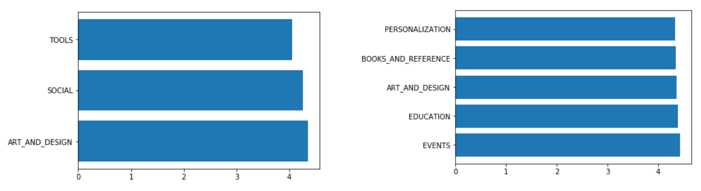

i DATING
puntuaciones[i] 3.971
i TOOLS
puntuaciones[i] 4.047
i SOCIAL
puntuaciones[i] 4.256
i ART_AND_DESIGN
puntuaciones[i] 4.358


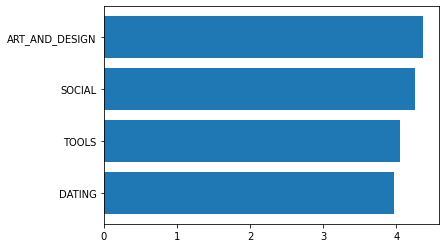

In [34]:
# Test de la función muestra_puntuaciones_medias sobre un diccionario de prueba
medias_prueba = {'DATING': 3.971,
                 'TOOLS': 4.047,
                 'SOCIAL': 4.256,
                 'ART_AND_DESIGN': 4.358}
muestra_puntuaciones_medias(medias_prueba, 3)

i ART_AND_DESIGN
puntuaciones[i] 4.358064516129031
i AUTO_AND_VEHICLES
puntuaciones[i] 4.19041095890411
i BEAUTY
puntuaciones[i] 4.278571428571428
i BOOKS_AND_REFERENCE
puntuaciones[i] 4.346067415730338
i BUSINESS
puntuaciones[i] 4.121452145214522
i COMICS
puntuaciones[i] 4.155172413793104
i COMMUNICATION
puntuaciones[i] 4.158536585365852
i DATING
puntuaciones[i] 3.9707692307692306
i EDUCATION
puntuaciones[i] 4.389032258064517
i ENTERTAINMENT
puntuaciones[i] 4.126174496644294
i EVENTS
puntuaciones[i] 4.435555555555557
i FINANCE
puntuaciones[i] 4.131888544891644
i FOOD_AND_DRINK
puntuaciones[i] 4.1669724770642205
i HEALTH_AND_FITNESS
puntuaciones[i] 4.2771043771043775
i HOUSE_AND_HOME
puntuaciones[i] 4.197368421052633
i LIBRARIES_AND_DEMO
puntuaciones[i] 4.178461538461538
i LIFESTYLE
puntuaciones[i] 4.094904458598724
i GAME
puntuaciones[i] 4.2863263445761195
i FAMILY
puntuaciones[i] 4.192272467086437
i MEDICAL
puntuaciones[i] 4.18914285714286
i SOCIAL
puntuaciones[i] 4.255598455598457
i

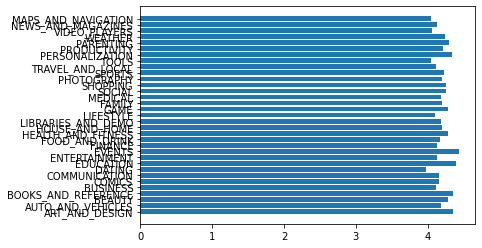

In [30]:
# Test de la función muestra_puntuaciones_medias sobre el diccionario completo
muestra_puntuaciones_medias(medias, 5)  # Solo se puede ejecutar si el ejercicio puntuacion_media_por_categoria está resuelto